In [247]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

## (outline)

- Loss function for logistic regression:
$$
L(\hat\theta, X, y) = \frac{1}{n} \sum_{i} \left(-y_i \ln \left(f_{\hat\theta} \left(X_i\right) \right) - \left(1 - y_i \right) \ln \left(1 - f_{\hat\theta} (X_i)\right)\right)
$$
- Loss functions for regularized logistic regression (L1 and L2):
$$
L(\hat\theta, X, y) = \frac{1}{n} \sum_{i} \left(-y_i \ln \left(f_{\hat\theta} \left(X_i\right) \right) - \left(1 - y_i \right) \ln \left(1 - f_{\hat\theta} (X_i)\right)\right) + \lambda\sum_{i}\left|\theta_i\right|
$$
$$
L(\hat\theta, X, y) = \frac{1}{n} \sum_{i} \left(-y_i \ln \left(f_{\hat\theta} \left(X_i\right) \right) - \left(1 - y_i \right) \ln \left(1 - f_{\hat\theta} (X_i)\right)\right) + \lambda\sum_{i}{\theta_i}^2
$$
- Walk through examples and visualizations
    - [https://gist.github.com/kevindavenport/c524268ed0713371aa32#file-regularized_logistic_regression_intuition-ipynb](https://gist.github.com/kevindavenport/c524268ed0713371aa32#file-regularized_logistic_regression_intuition-ipynb)

In [268]:
# HIDDEN
from sklearn.datasets import make_circles
palette = sns.color_palette('Set2')

X, y = make_circles(noise=0.3, factor=0.65, random_state=42)
X1 = X[:, 0]
X2 = X[:, 1]

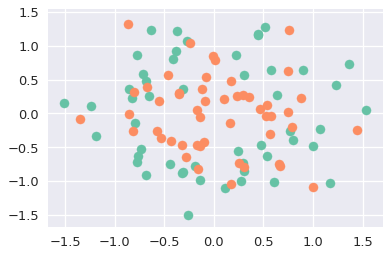

In [269]:
plt.scatter(X1[y==0], X2[y==0], color=palette[0])
plt.scatter(X1[y==1], X2[y==1], color=palette[1])

In [273]:
# HIDDEN
def create_features(X1, X2, degree=20):
    num_features = (degree + 1) * (degree + 2) / 2
    output = np.empty(shape=(X1.shape[0], int(num_features)), dtype=np.float)
    k = 0
    
    for i in np.arange(0, degree + 1):
        for j in np.arange(0, i + 1):
            new_feature_values = X1 ** (i - j) * X2 ** j
            output[:, k] = new_feature_values
            k += 1
    return output

def plot_decision_boundary(X, y, theta):
    z = np.zeros([50, 50])
    uu = np.linspace(-1.5, 1.5, 50)
    vv = np.linspace(-1.5, 1.5, 50)
    for i, u in enumerate(uu):
        for j, v in enumerate(vv):
            z[i, j] = np.dot(create_features(np.array([[u]]), np.array([[v]])), theta.T)[0]
    plt.contour(uu, vv, z.T, [0])

X = create_features(X1, X2)

### No regularization

In [274]:
lr = LogisticRegression(random_state=42)
lr.fit(X, y)
confusion_matrix(y, lr.predict(X))

array([[35, 15],
       [ 6, 44]])

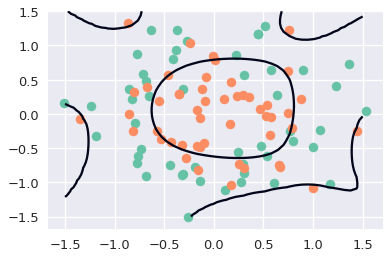

In [275]:
plt.scatter(X1[y==0], X2[y==0], color=palette[0])
plt.scatter(X1[y==1], X2[y==1], color=palette[1])
plot_decision_boundary(X, y, lr.coef_)

### L2 Regularization

In [286]:
lr_l2_reg = LogisticRegression(C=0.0000003, penalty='l2', random_state=42)
lr_l2_reg.fit(X, y)
confusion_matrix(y, lr_l2_reg.predict(X))

array([[48,  2],
       [32, 18]])

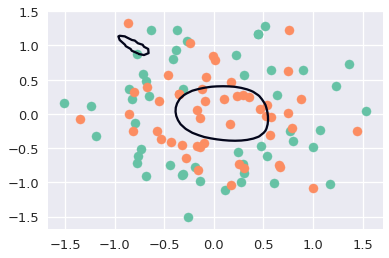

In [288]:
plt.scatter(X1[y==0], X2[y==0], color=palette[0])
plt.scatter(X1[y==1], X2[y==1], color=palette[1])
plot_decision_boundary(X, y, lr_l2_reg.coef_)

### L1 Regularization

In [299]:
lr_l1_reg = LogisticRegression(C=0.1, penalty='l1', random_state=42)
lr_l1_reg.fit(X, y)
confusion_matrix(y, lr_l1_reg.predict(X))

array([[39, 11],
       [34, 16]])

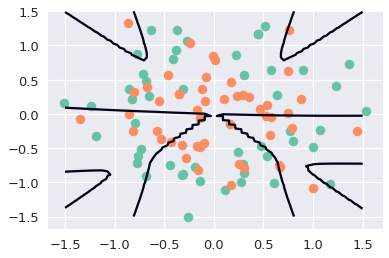

In [300]:
plt.scatter(X1[y==0], X2[y==0], color=palette[0])
plt.scatter(X1[y==1], X2[y==1], color=palette[1])
plot_decision_boundary(X, y, lr_l1_reg.coef_)